In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Načtení dat ze souboru CSV v podadresáři 'data'
data = pd.read_csv('data/world_bank_indicators.csv')
# Shrnutí dat a seznam názvů sloupců
print("Souhrn dat:")
print(data.describe())
print("\nSeznam názvů sloupců:")
print(list(data.columns))



Souhrn dat:
               year  Access to electricity (% of population)  \
count  16960.000000                              7611.000000   
mean    1991.500000                                81.045979   
std       18.473498                                28.546144   
min     1960.000000                                 0.533899   
25%     1975.750000                                69.653940   
50%     1991.500000                                98.400000   
75%     2007.250000                               100.000000   
max     2023.000000                               100.000000   

       Adjusted net savings, including particulate emission damage (% of GNI)  \
count                                        5429.000000                        
mean                                            7.793301                        
std                                            11.557922                        
min                                          -166.127193                        
25%   

## Various Simple Models

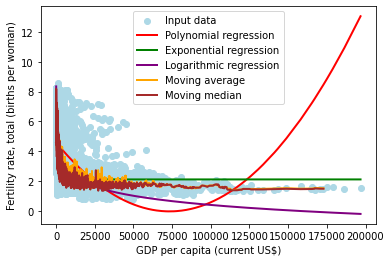

In [5]:
# Vybrané parametry pro modelování
#X = data[['GDP per capita (current US$)', 'Labor force, female (% of total labor force)', 'Life expectancy at birth, female (years)']]
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

X = data['GDP per capita (current US$)']
Y = data['Fertility rate, total (births per woman)']

# Remove NaN rows
mask = pd.notnull(X) & pd.notnull(Y)
X = X[mask]
Y = Y[mask]

X_array = np.array(X)

# Polynomial regression (2nd degree)
X_values = X_array.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_values)
model_poly = LinearRegression()
model_poly.fit(X_poly, Y)
pred_poly = model_poly.predict(X_poly)

# Exponential regression
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

params_exp, _ = curve_fit(exp_func, X_array, Y, p0=(1, -0.0001, 1), maxfev=10000)
pred_exp = exp_func(X_array, *params_exp)

# Logarithmic regression
def log_func(x, a, b):
    return a + b * np.log(x + 1)

params_log, _ = curve_fit(log_func, X_array, Y, p0=(1, -1))
pred_log = log_func(X_array, *params_log)

# Moving average and moving median
window_size = 10
  # You can adjust the window size
sorted_idx = np.argsort(X_array)
X_sorted = X_array[sorted_idx]
Y_sorted = np.array(Y)[sorted_idx]

moving_avg = pd.Series(Y_sorted).rolling(window=window_size, center=True).mean()
moving_median = pd.Series(Y_sorted).rolling(window=window_size, center=True).median()

# Plot
plt.scatter(X_array, Y, label='Input data', color='lightblue')
plt.plot(X_sorted, pred_poly[sorted_idx], color='red', linewidth=2, label='Polynomial regression')
plt.plot(X_sorted, pred_exp[sorted_idx], color='green', linewidth=2, label='Exponential regression')
plt.plot(X_sorted, pred_log[sorted_idx], color='purple', linewidth=2, label='Logarithmic regression')
plt.plot(X_sorted, moving_avg, color='orange', linewidth=2, label='Moving average')
plt.plot(X_sorted, moving_median, color='brown', linewidth=2, label='Moving median')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate, total (births per woman)')
plt.legend()
plt.show()


Implicative Quantifier-based Model with 5 rules

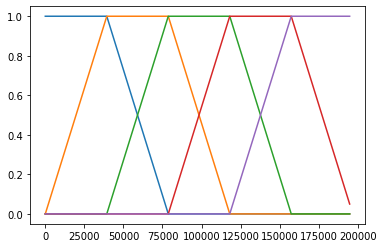

[2.178857745730192, 1.440589948303455, 1.4520281839046623, 1.388069693829736, 1.427065599887878]
[5.619197412182104, 2.923493256611559, 1.9248971896709313, 1.693556406179714, 1.5778814537954895]


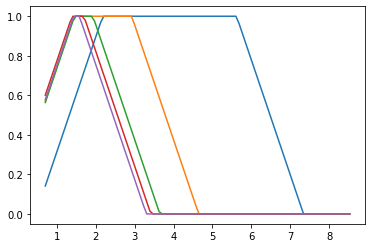

[0.79, 0.9, 0.96, 0.98, 0.99]


1


2


3


4


In [6]:
from definitions import FuzzyRelations
from definitions import models
from definitions import models as md
from definitions import quantifiers
import openpyxl

from importlib import reload  # Python 3.4+
FuzzyRelations = reload(FuzzyRelations)
models = reload(models)
quantifiers = reload(quantifiers)

# read data
datax=X
datavalx=Y
# Remove NaN rows
mask = pd.notnull(datax) & pd.notnull(datavalx)
datax = datax[mask]
datavalx = datavalx[mask]

# set declination of fuzzy sets
decl=5
# set numbers (-1) of fuzzy sets on X,Y, respectively
nrules=5
# generate model from data for internaly set discretization 100 and create plots
ModelQuantifiedRules=md.QRules(datax,datavalx,nrules,decl)


In [13]:
maxx=max(datax)
maxfx=max(datavalx)
minx=min(datax)
minfx=min(datavalx)
xy=[minx,maxx,minfx,maxfx]
print(xy)

[11.8013216739, 196783.729414593, 0.701, 8.606]
19677.192809291908 0.7905
11.8013216739
196783.729414593


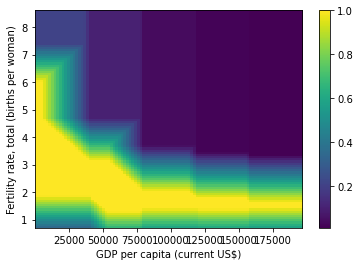

In [16]:

plt.imshow(ModelQuantifiedRules,extent =[xy[0], xy[1], xy[2], xy[3]], 
           cmap='viridis', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate, total (births per woman)')
plt.show()


## Defuzzify and Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set discretization of X and Y for final plots
disx=100
x=[minx+k*((maxx-minx)/disx) for k in range(0,disx)]
disy=100
y=[minfx+k*((maxfx-minfx)/disy) for k in range(0,disy)]

# Defuzzifikace každého řádku jako model fuzzy množiny
cogs = []
moms = []
maxoms = []
minoms = []
for i in range(0, len(ModelQuantifiedRules)):
    mu = ModelQuantifiedRules[:,i]
    cogs.append(md.defuzzify_cog(y, mu))
    moms.append(md.defuzzify_mom(y, mu))
    maxoms.append(md.defuzzify_maxom(y, mu))
    minoms.append(md.defuzzify_minom(y, mu))



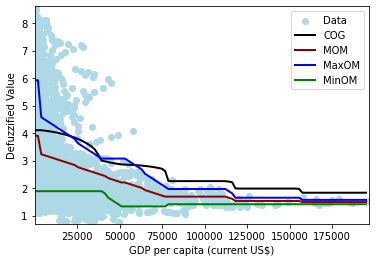

In [47]:
# Výpis a graf
plt.scatter(data['GDP per capita (current US$)'], data['Fertility rate, total (births per woman)'], label='Data', color='lightblue')
# Překreslení křivek
plt.plot(x, cogs, label='COG', color='black', linewidth=2)
plt.plot(x, moms, label='MOM', color='darkred', linewidth=2)
plt.plot(x, maxoms, label='MaxOM', color='blue', linewidth=2)
plt.plot(x, minoms, label='MinOM', color='green', linewidth=2)
plt.xlim(xy[0], xy[1])
plt.ylim(xy[2], xy[3])
plt.xlabel('GDP per capita (current US$)')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Defuzzified Value')
plt.gca().set_aspect("auto") 
plt.legend()
plt.show()


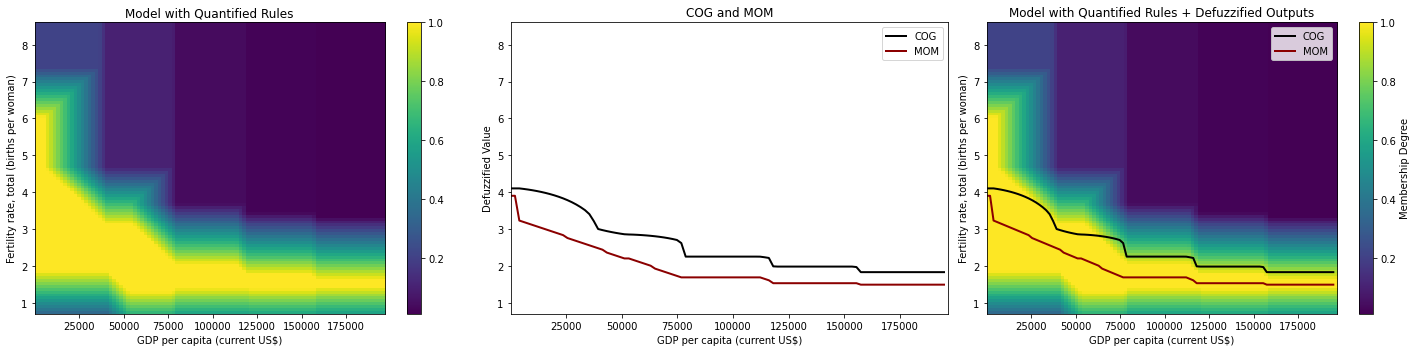

In [41]:
plt.figure(figsize=(20,5))

# Zobrazíme matici ModelQuantifiedRules
plt.subplot(1,3,1)
plt.imshow(ModelQuantifiedRules,extent =[xy[0], xy[1], xy[2], xy[3]], 
           cmap='viridis', interpolation='nearest', origin='lower', aspect='auto')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate, total (births per woman)')
plt.colorbar()
plt.title('Model with Quantified Rules')

# Graf čar pro COG a MOM
plt.subplot(1,3,2)
plt.plot(x, cogs, label='COG', color='black', linewidth=2)
plt.plot(x, moms, label='MOM', color='darkred', linewidth=2)
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Defuzzified Value')
plt.xlim(xy[0], xy[1])
plt.ylim(xy[2], xy[3])
plt.legend()
plt.title('COG and MOM')

# Zobrazíme matici ModelQuantifiedRules a defuzzifikace dohromady
plt.subplot(1,3,3)
# Imshow – fuzzy mapa jako pozadí
plt.imshow(ModelQuantifiedRules, extent=xy, cmap='viridis',
           interpolation='nearest', origin='lower', aspect='auto')

# Překreslení křivek
plt.plot(x, cogs, label='COG', color='black', linewidth=2)
plt.plot(x, moms, label='MOM', color='darkred', linewidth=2)

# Popisky
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate, total (births per woman)')
plt.title('Model with Quantified Rules + Defuzzified Outputs')

# Barevná legenda
plt.colorbar(label='Membership Degree')

# Legenda k čarám
plt.legend()

# Zobrazení
plt.tight_layout()
plt.show()


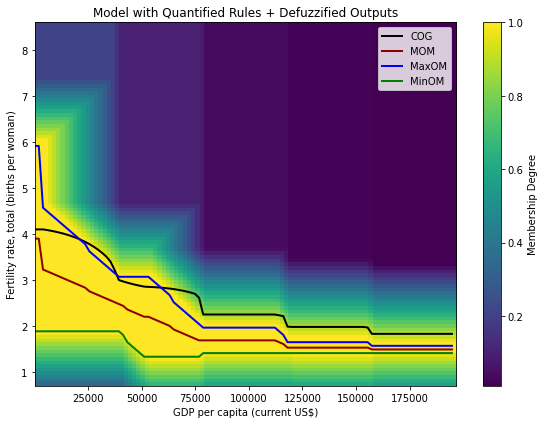

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Imshow – fuzzy mapa jako pozadí
plt.imshow(ModelQuantifiedRules, extent=xy, cmap='viridis',
           interpolation='nearest', origin='lower', aspect='auto')

# Překreslení křivek
plt.plot(x, cogs, label='COG', color='black', linewidth=2)
plt.plot(x, moms, label='MOM', color='darkred', linewidth=2)
plt.plot(x, maxoms, label='MaxOM', color='blue', linewidth=2)
plt.plot(x, minoms, label='MinOM', color='green', linewidth=2)

# Popisky
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Fertility rate, total (births per woman)')
plt.title('Model with Quantified Rules + Defuzzified Outputs')

# Barevná legenda
plt.colorbar(label='Membership Degree')

# Legenda k čarám
plt.legend()

# Zobrazení
plt.tight_layout()
plt.show()
